In [9]:
import numpy as np
import matplotlib.pyplot as plt


## Introduction
- Gibbs sampling is a way to generate random samples from a complicated probability distribution when direct sampling is difficult. It works by breaking the problem into simpler pieces and sampling from each piece one at a time.



## Concept
- Imagine you are lost in a big city and want to reach a specific location, but you only know how to move left-right or up-down, not diagonally. So, you follow this simple rule:

- Move left or right while keeping your vertical position fixed.
Then, move up or down while keeping your horizontal position fixed.
Repeat this process until you explore the whole area.
Even though you never take a direct path, repeating this enough times helps you reach any part of the city.

- Gibbs sampling follows the same idea. It samples one variable at a time, using the most recent value of the other variable.



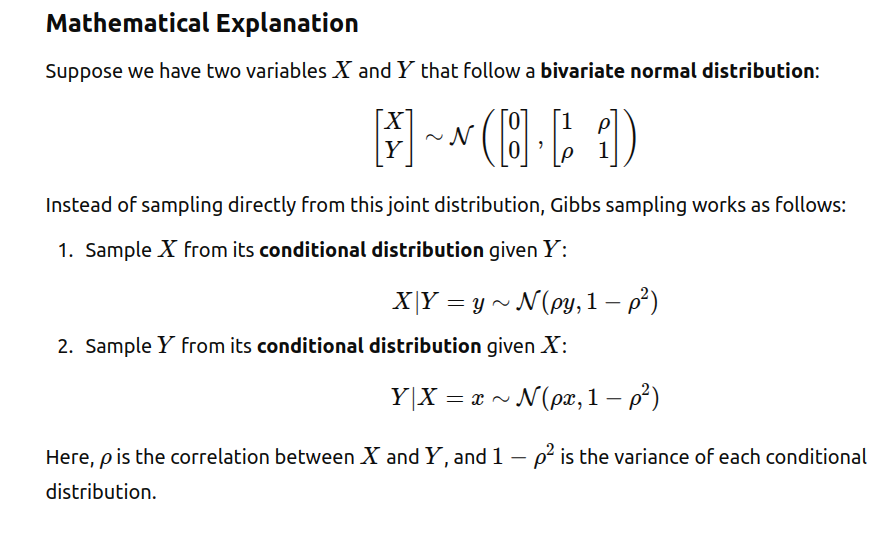

## Example 1: Student's Grades and Study Hours

Let’s say a student’s exam score (X) and study hours (Y) are related. If you know how much they studied, you can predict their score. Similarly, if you know their score, you can estimate their study hours.

Using Gibbs sampling, we alternate between:

- Estimating the score based on study hours.
- Estimating the study hours based on the score.
- After many iterations, we get a realistic distribution of possible scores and study times.



## Example 2: Weather Prediction
Assume the temperature today (X) and humidity (Y) are related. If we know the temperature, we can predict the humidity, and vice versa. Instead of guessing both at once, Gibbs sampling lets us:

- Predict humidity given today's temperature.
- Predict temperature given humidity.
- Repeat the process to get a realistic weather pattern.

In [10]:
def gibbs_sampling(rho, x0, y0, n_samples= 10000):
    """Perform Gibbs sampling for a bivariate normal distribution."""
    sigma_sq = 1 - rho**2  # Variance of conditional distributions

    # Initialize samples
    x_samples = np.zeros(n_samples)
    y_samples = np.zeros(n_samples)
    x_samples[0] = x0
    y_samples[0] = y0

    # Gibbs Sampling
    for i in range(1, n_samples):
        x_samples[i] = np.random.normal(rho * y_samples[i-1], sigma_sq)
        y_samples[i] = np.random.normal(rho * x_samples[i], sigma_sq)

    return x_samples, y_samples



In [11]:
def plot_samples(x_samples, y_samples):
    """Plot the Gibbs sampling results."""
    plt.figure(figsize=(6,6))
    plt.scatter(x_samples, y_samples, alpha=0.3, s=1)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Gibbs Sampling from Bivariate Normal Distribution")
    plt.show()


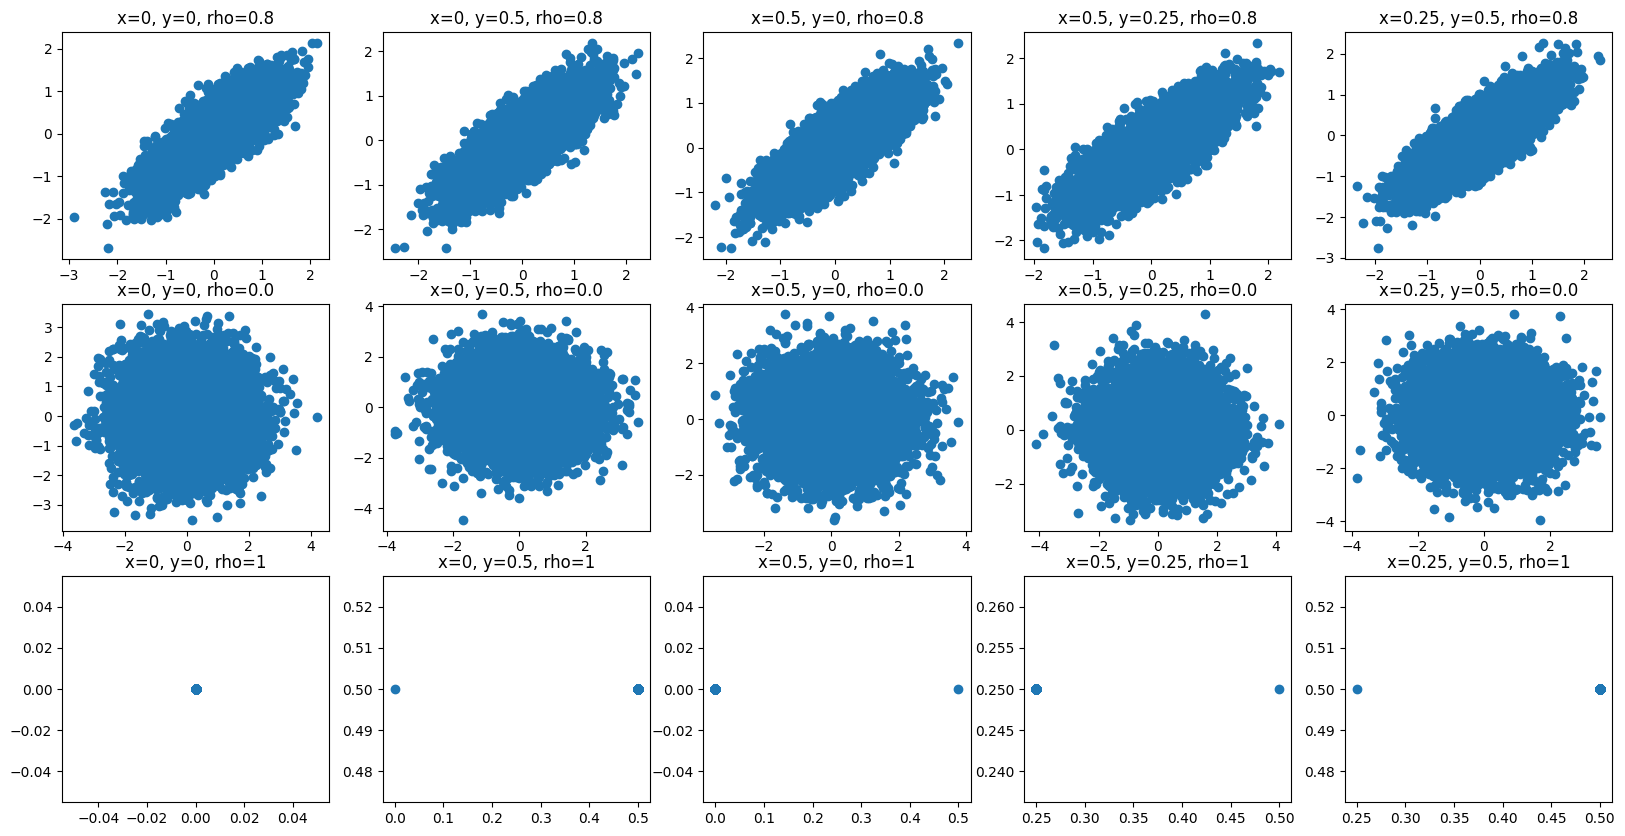

In [14]:
if __name__ == "__main__":
  plt.figure(figsize = (20, 10))
  x = [0, 0, 0.5, 0.5, 0.25] * 3
  y = [0, 0.5, 0, 0.25, 0.5] * 3
  rho = [0.8]* 5 + [0.0]* 5 + [1]*5
  for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.title('x={}, y={}, rho={}'.format(x[i],y[i],rho[i]))
    x_samples, y_samples = gibbs_sampling(rho[i], x0=x[i], y0=y[i])
    plt.scatter(x_samples, y_samples)
 


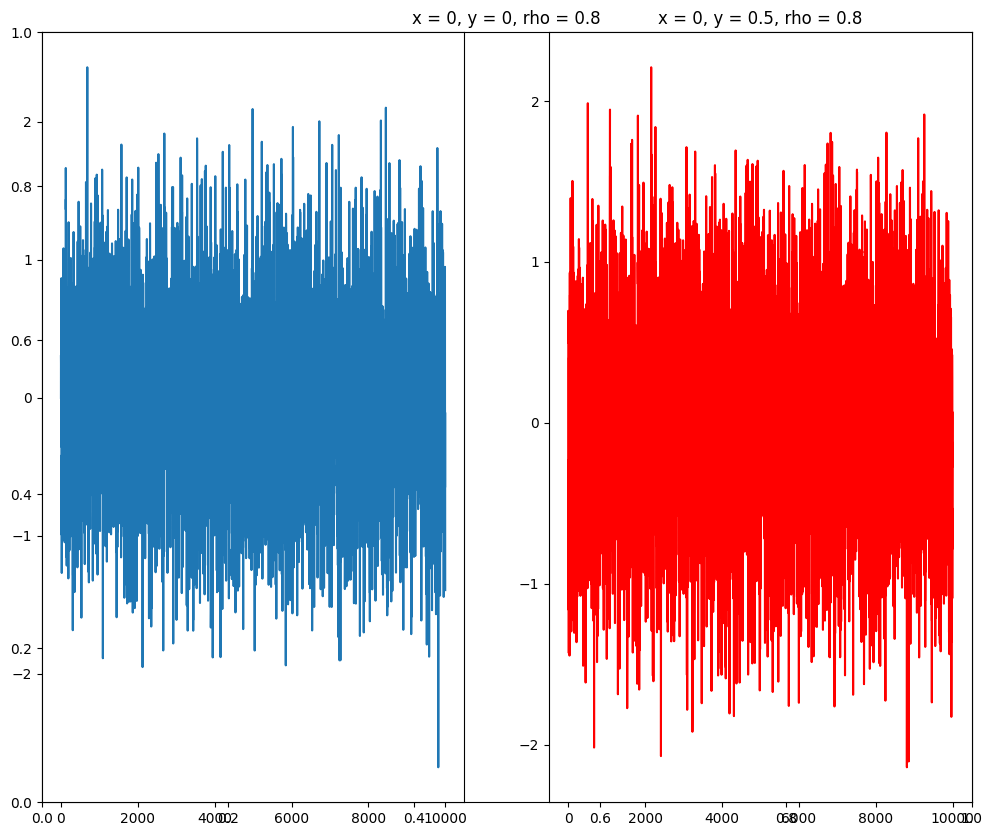

In [ ]:
if __name__ == "__main__":
  x_samples, y_samples = gibbs_sampling(rho = 0.8, x0=0, y0=0)
  plt.figure(figsize = (12, 10))
  plt.title('x = 0, y = 0, rho = 0.8')
  plt.subplot(1, 2, 1)
  plt.plot(x_samples)

  x1_samples, y1_samples = gibbs_sampling(rho = 0.8, x0=0, y0=0.5)
  plt.subplot(1, 2, 2)
  plt.title('x = 0, y = 0.5, rho = 0.8')
  plt.plot(y1_samples,color='red')
  plt.show()
